<a href="https://colab.research.google.com/github/raffaelhfarias/Dados_Airbnb/blob/main/Analisando_os_Dados_do_Airbnb_Veneza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Raffael Henrique
links: [Linkedin](https://www.linkedin.com/in/raffael-henrique-59922520a/), [Github](https://github.com/raffaelhfarias).

---

# Análise dos Dados do Airbnb - *Veneza*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Veneza na Itália, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [ ]:
# importando os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importando o arquivo listings.csv para um DataFrame, lembrando que os dados se atualizam.
df = pd.read_csv('http://data.insideairbnb.com/italy/veneto/venice/2022-09-07/visualisations/listings.csv')

## Análise dos Dados


**Dicionário das variáveis**

* `id`: número de id gerado para identificar o imóvel
* `name`:	nome da propriedade anunciada
* `host_id`: número de id do proprietário (anfitrião) da propriedade
* `host_name`: Nome do anfitrião
* `neighbourhood_group`: esta coluna não contém nenhum valor válido
* `neighbourhood`: nome do bairro
* `latitude`: coordenada da latitude da propriedade
* `longitude`: coordenada da longitude da propriedade
* `room_type`: informa o tipo de quarto que é oferecido
* `price`: preço para alugar o imóvel
* `minimum_nights`:	quantidade mínima de noites para reservar
* `number_of_reviews`: número de avalições que a propriedade possui
* `last_review`: data da última avaliação
* `reviews_per_month`:	quantidade de avaliações por mês
* `calculated_host_listings_count`:	quantidade de imóveis do mesmo anfitrião
* `availability_365`: número de dias de disponibilidade dentro de 365 dias
* `number_of_reviews_ltm`:	número de avaliações nos últimos 12 meses
* `license`: se o imóvel possui licensa

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [ ]:
# mostrando as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,6623,Venice Blue on Canal apartment,15016,Francesca,Isole,San Polo,45.43817,12.32739,Entire home/apt,250,5,175,2022-08-16,1.12,3,266,12,NaN
1,6624,Venice garden charme and canal view!,15016,Francesca,Isole,Santa Croce,45.43977,12.32736,Entire home/apt,290,4,75,2022-08-06,0.56,3,316,11,NaN
2,12074,Venice home to relax and emotions,15016,Francesca,Isole,San Polo,45.43896,12.32970,Entire home/apt,180,4,195,2022-07-11,1.29,3,240,11,NaN
3,27116,Junior Suite with balcony overlooking canal,116144,Giò&Giò,Isole,San Marco,45.43277,12.33456,Private room,250,1,416,2022-06-09,2.83,2,70,5,NaN
4,44527,Historical Luxury Apartment on Calm Sunny Canal,120215,Marc & Elisabeth,Isole,Cannaregio,45.44569,12.32902,Entire home/apt,320,3,96,2022-09-03,0.69,1,223,18,M0270422294


### **Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [ ]:
# identificando o volume de dados do DataFrame
print('Entradas:\t {}'.format(df.shape[0]))
print('Variáveis:\t {}\n'.format(df.shape[1]))

# verificando os tipos dos dados do dataset
df.dtypes

Entradas:	 7988
Variáveis:	 18



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

Vemos que a variável `last_review` está como object, por ser uma data e como eu considero datas um dado muito importante se tratando de análises, iremos transformar a variável em datetime utilizando o `pd.to_datetime`

In [ ]:
# Alterando o tipo da variável
df['last_review'] = pd.to_datetime(df['last_review'], format='%Y-%m-%d')

# Visualizando a alteração
df.dtypes

id                                         int64
name                                      object
host_id                                    int64
host_name                                 object
neighbourhood_group                       object
neighbourhood                             object
latitude                                 float64
longitude                                float64
room_type                                 object
price                                      int64
minimum_nights                             int64
number_of_reviews                          int64
last_review                       datetime64[ns]
reviews_per_month                        float64
calculated_host_listings_count             int64
availability_365                           int64
number_of_reviews_ltm                      int64
license                                   object
dtype: object

### **Qual a porcentagem de valores ausentes no *dataset*?**

In [ ]:
# ordenando em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]*100).sort_values(ascending=False)

license                           79.006009
reviews_per_month                  9.989985
last_review                        9.989985
name                               0.000000
number_of_reviews_ltm              0.000000
availability_365                   0.000000
calculated_host_listings_count     0.000000
number_of_reviews                  0.000000
minimum_nights                     0.000000
id                                 0.000000
room_type                          0.000000
longitude                          0.000000
latitude                           0.000000
neighbourhood                      0.000000
neighbourhood_group                0.000000
host_name                          0.000000
host_id                            0.000000
price                              0.000000
dtype: float64

Para efeitos de análises as colunas que mais possuem valores em branco não interferem em qualquer linha de raciocínio. 

### **Qual o tipo de distribuição das variáveis?** 

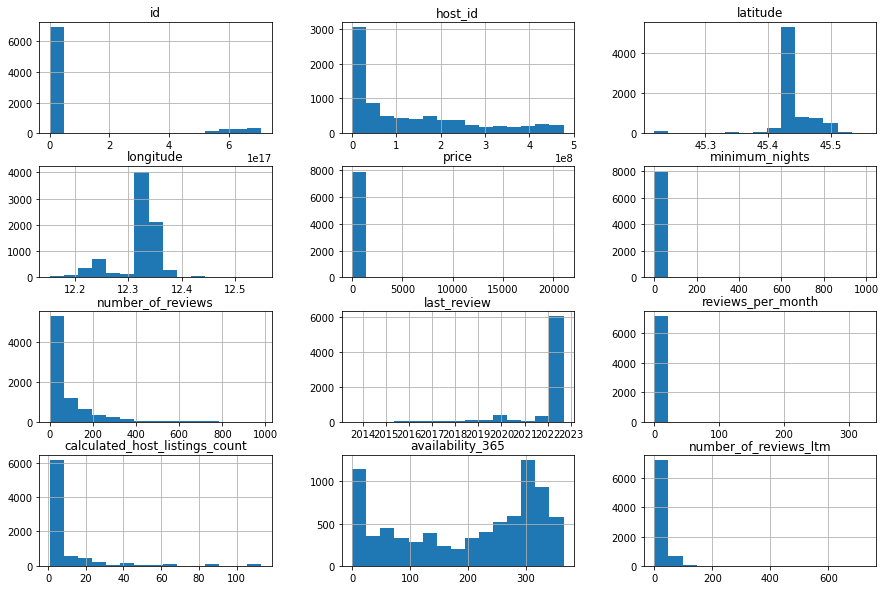

In [ ]:
# plotando histograma das variáveis numéricas
df.hist(bins=15, figsize=(15,10));

### **Verificando Outliers**

Pela distribuição dos histogramas, é possível verificar indícios da presença de *outliers*. Olhe por exemplo as variáveis `price`, `minimum_nights`.

> Os outliers são dados que se diferenciam drasticamente de todos os outros. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Há duas maneiras rápidas que auxiliam a detecção de *outliers*. São elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para a variável.

In [ ]:
# Aplicando o describe
df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,7988.000000,7988.000000,7988.000000,7190.000000,7988.000000,7988.000000
mean,268.780421,2.666375,70.130446,1.850384,9.948172,197.939159
std,1080.746953,13.732286,99.494762,4.781660,19.122828,122.551494
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,100.000000,1.000000,6.000000,0.490000,1.000000,76.000000
50%,146.000000,2.000000,30.000000,1.240000,3.000000,237.000000
75%,229.000000,3.000000,95.000000,2.517500,8.000000,308.000000
max,21000.000000,999.000000,981.000000,326.420000,113.000000,365.000000


Verificando as informações acima temos dois questionamentos:

*   A variável `price` possui 75% do valor até 229, mas o valor máximo é 21000 acredito que seja um desvio considerável.
*   A quantidade mínima de noites(`minimum_nights`) o valor máximo está maior que 365 dias.

#### Boxplot para `minimum_nights`

O gráfico Boxplot é, normalmente, utilizado para visualizar ou identificar se há presença de outliers nos dados.


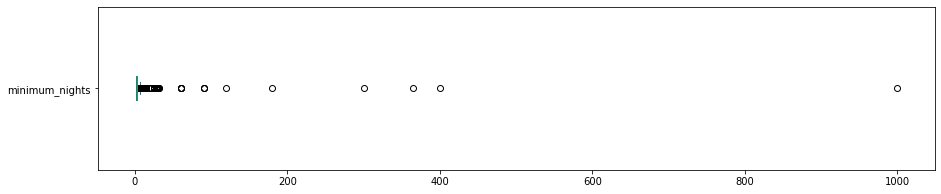

minimum_nights: valores acima de 30:
15 entradas
0.1878%


In [ ]:
# Plotando o boxplot
df['minimum_nights'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificando a quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price

**Porque estou utilizando o valor 268?** 

Como não tenho conhecimento de absolutamente nada sobre valores lá em Veneza na Itália kkk, peguei o valor médio da variável `price`.

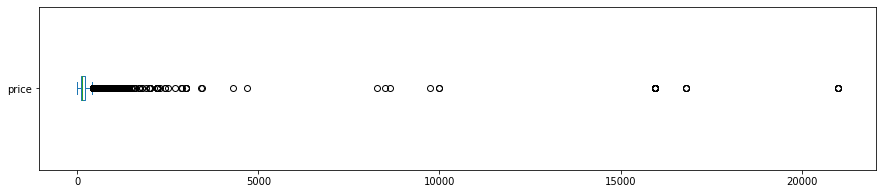


price: valores acima de 268:
4 entradas
0.0501%


In [ ]:
# Plotando o boxplot
df['price'].plot(kind='box', vert=False, figsize=(15, 3))
plt.show()

# Verificando a quantidade de valores acima de 268 dias para price
print("\nprice: valores acima de 268:")
print("{} entradas".format(len(df[df.minimum_nights > 268])))
print("{:.4f}%".format((len(df[df.minimum_nights > 268]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Já que identificamos *outliers* nas variáveis `price` e `minimum_nights`, vamos agora limpar o *DataFrame* delas e plotar novamente o histograma.

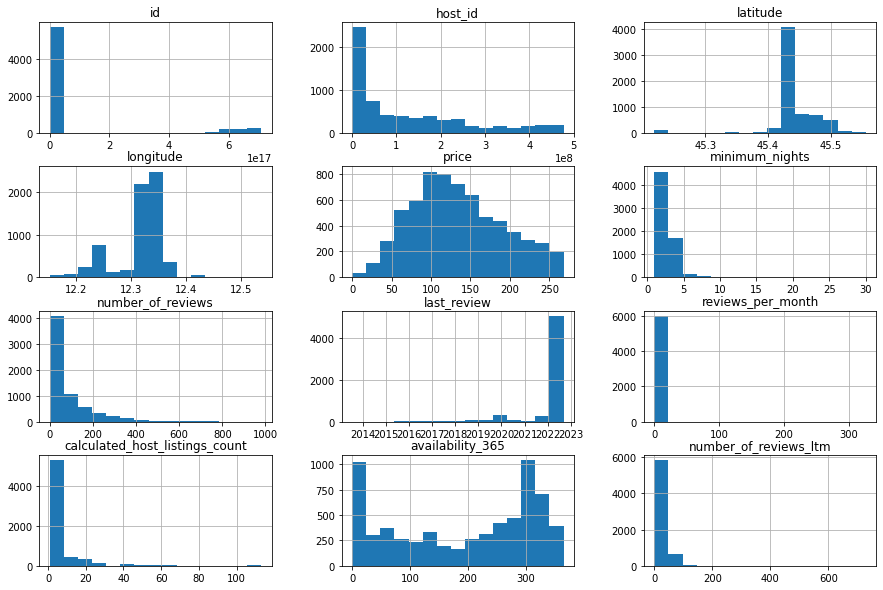

In [ ]:
# removendo os *outliers* em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean['price'] > 268].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean['minimum_nights'] > 30].index, axis=0, inplace=True)

# plotando o histograma para as variáveis numéricas
df_clean.hist(bins=15, figsize=(15,10));

Já conseguimos ver algo mais analisável nos gráficos de histograma das variáveis `price` e `minimum_nights`.

### **Qual a média dos preços de aluguel?**

In [ ]:
# vendo a média da coluna `price`
df['price'].mean()

268.7804206309464

### **Qual a correlação existente entre as variáveis?**

In [ ]:
# criando uma matriz de correlação
corr = df[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count', 'availability_365']].corr()
# mostrando a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.007411,-0.074642,-0.034127,0.127898,0.092112
minimum_nights,-0.007411,1.000000,-0.014808,-0.012145,-0.025321,0.008312
number_of_reviews,-0.074642,-0.014808,1.000000,0.296010,-0.155901,-0.020956
reviews_per_month,-0.034127,-0.012145,0.296010,1.000000,-0.050995,-0.006563
calculated_host_listings_count,0.127898,-0.025321,-0.155901,-0.050995,1.000000,0.166828
availability_365,0.092112,0.008312,-0.020956,-0.006563,0.166828,1.000000


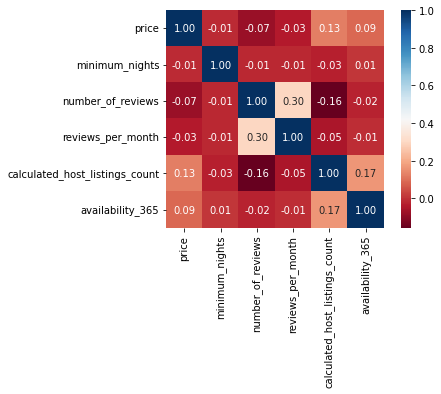

In [ ]:
# plotando um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

A efeito de análise/estudo não existem correlações nas variáveis testadas.

### **Qual o tipo de imóvel mais alugado no Airbnb?**

In [ ]:
# mostrando a quantidade de cada tipo de imóvel disponível
df['room_type'].value_counts()

Entire home/apt    6182
Private room       1585
Hotel room          194
Shared room          27
Name: room_type, dtype: int64

In [ ]:
# mostrando a porcentagem de cada tipo de imóvel disponível
df['room_type'].value_counts() / df.shape[0]*100

Entire home/apt    77.391087
Private room       19.842263
Hotel room          2.428643
Shared room         0.338007
Name: room_type, dtype: float64

### **Qual a localidade mais cara do dataset?**



In [ ]:
# verificando os preços por bairros, na média
df.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:15]

neighbourhood
Isola Cason Grassabo'          21000.000000
Tronchetto                      2569.500000
Zona Commerciale via Torino     1972.294118
Piave 1860                       989.763889
Capitello                        875.000000
Ferrarese                        450.000000
Favaro                           351.627907
Vignole                          330.000000
San Marco                        290.619348
Alberoni                         250.169811
Torcello                         250.000000
Lido                             248.081325
Santa Croce                      239.703704
San Polo                         236.300687
Dorsoduro                        234.701571
Name: price, dtype: float64

Apesar de não ter conhecimento com a localidade de Veneza na Italia achei muito estranho o fato da média de preço ser 268, mas exatamente em um local o valor por noite ser 21000, possa ter sido algum erro de digitação, não podemos dizer ao certo o motivo desse valor, mas não podemos considera-lo como algo verídico.

In [ ]:
df['neighbourhood'].value_counts().sort_values()[:20]

Vignole                             1
San Pietro in Volta                 1
Favaro Col San Martino              1
Isola San Michele                   1
Marocco Zelarino                    1
Torcello                            1
Mazzorbo                            1
Molino Ronchin                      1
Ca' Brentelle                       1
Isola di Tessera                    1
Ca' Solaro                          1
Giustizia                           1
Centro Commerciale Panorama         1
Maguolo                             1
Isola Cason Grassabo'               1
Isola San Giorgio                   1
Asseggiano                          2
Isola Cason vecchio di Grassabo'    2
Capitello                           2
Campalto CEP                        2
Name: neighbourhood, dtype: int64

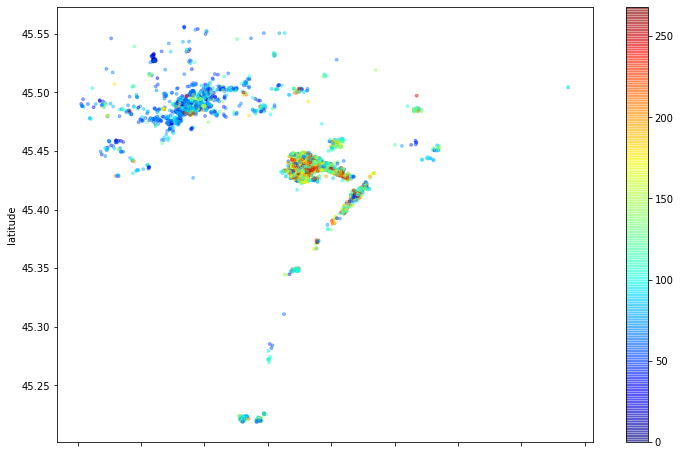

In [ ]:
# plotando os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
df['minimum_nights'].mean()

2.666374561842764

## Conclusões


Apesar de ter sido uma análise rápida sobre as variáveis `price`, `minimun_nights`, conseguimos identificar e tratar alguns erros nos dados, como por exemplo: *Data, Outliers, Dados Faltantes*, utilizamos alguns gráficos para verificar os dados como: *histograma, boxplot, scatter*.

Há uma grande concentração de valores mais altos no centro de Veneza por conta das pontes que cruzam as regiões da cidade e os passeios de gôndolas, tradicionais especialmente para os casais apaixonados, encantam as pessoas e só fazem o desejo de viajar para Veneza aumentar, o que faz a atmosfera da cidade ser mágica.